## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [5]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [6]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],)) # coefficients de regression initialisés à 0
    w_old = w 
    y = 1/2*np.ones((N_train,)) # probabilités d'appartenir à la classe 1 initialisées à 1/2
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algortihme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ): 
        # arrêt par critère de convergence ou nombre d'iterations
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w))) # mise à jour des probabilités en appliquant la fonction logistique
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) # calcul du z intermédiaire
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z) # calcul de w_new optimisé
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [7]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)

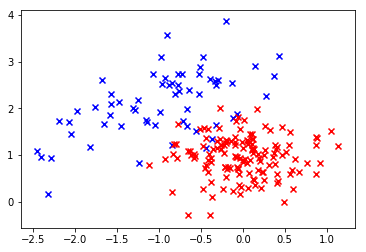

In [10]:
plt.scatter(x_test[class_test_1][:,0],x_test[class_test_1][:,1],marker='x',c='b')
plt.scatter(x_test[class_test_2][:,0],x_test[class_test_2][:,1],marker='x',c='r')
plt.show()

On voit en observant les données sur le test set qu'elles ne sont pas linéairement séparables. On n'obtiendra pas une erreur nulle avec une frontière de décision simplement linéaire.

### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [11]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [12]:
def f_logistic(x):
    '''retourne l'image de x par la fonction logistique '''
    return 1/(1+np.exp(-x))

In [13]:
#Exercise 1
w, Niter = regression_logistique(X, t, 50)
y = X_test.dot(w)
y_pred = np.zeros(y.shape)

# Fonction de décision :
y_pred[y>0] = 1 # classe 1
y_pred[y<=0] = 0 # classe 2

print("Erreur : ",sum(abs(y_pred-t_test))/len(t_test))
print("Vecteur de poids",w)

Erreur :  0.06
Vecteur de poids [-15.206658    -7.91866363   6.56243114]


Notre fonction de décision est bien équivalente à prendre $argmax_k (P(C_k|x))$. 
En effet, dans le cas K=2, $P(C_1|x) = \sigma(w^Tx) = 1-P(C_2|x)$.

You can draw the decision boundary $w^Tx = 0$ by using: 


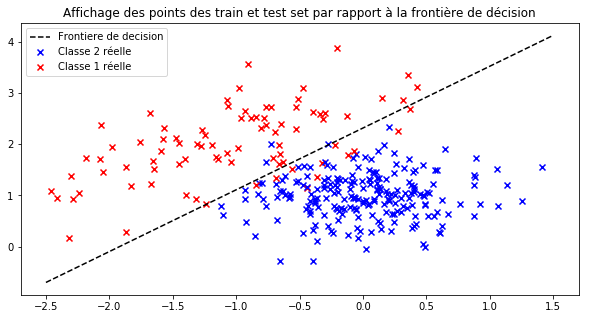

In [14]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.figure(figsize=(10,5))
plt.plot(x1,x2,'k--')
plt.scatter(x_test[t_test==0][:,0],x_test[t_test==0][:,1],marker='x',c='b')
plt.scatter(x_test[t_test==1][:,0],x_test[t_test==1][:,1],marker='x',c='r')
plt.scatter(x_train[t==0][:,0],x_train[t==0][:,1],marker='x',c='b')
plt.scatter(x_train[t==1][:,0],x_train[t==1][:,1],marker='x',c='r')
plt.title("Affichage des points des train et test set par rapport à la frontière de décision")
plt.legend(("Frontiere de decision","Classe 2 réelle", "Classe 1 réelle"))
plt.show()

**Construction de la frontière de décision**

$w$ contient un terme de biais et 2 coefficients associés aux 2 entrées.
$w^Tx = w_0 + w_1x_1 + w_2x_2$.

Si on pose $seuil = 1/2$, on a que $\sigma(w^Tx) = seuil \iff w^Tx = 0$

D'où la formule :

$x_2 = \frac{-w_0-w_1x_1}{w_2}$

La frontière de décision sépare les données avec une erreur de 6% sur le test set. Au dessus (resp. en dessous) de la frontière de décision, on prédit la classe 1 (resp. 2).

** Ajout de points loin de la frontière de décision dans le train set**

In [15]:
X_perturbe = np.zeros((X.shape[0]+4,X.shape[1]))
X_perturbe[4:,:] = X
X_perturbe[0,:] = [1, 3, -1.12]
X_perturbe[1,:] = [1, 2, -3.1]
X_perturbe[2,:] = [1, 3, -4.2]
X_perturbe[3,:] = [1, -2, 5.5]

t_perturbe = np.zeros((t.shape[0]+4,))
t_perturbe[4:] = t
t_perturbe[0] = 0
t_perturbe[1] = 0
t_perturbe[2] = 0
t_perturbe[3] = 1

In [16]:
w_perturbe, Niter = regression_logistique(X_perturbe, t_perturbe, 50)
y = X_test.dot(w)
y_pred = np.zeros(y.shape)
y_pred[y>0] = 1
y_pred[y<=0] = 0
print("Erreur : ",sum(abs(y_pred-t_test))/len(t_test))
print("Ancien vecteur de poids",w)
print("Nouveau vecteur de poids",w_perturbe)
print("Différence relative",(w_perturbe-w)/w)

Erreur :  0.06
Ancien vecteur de poids [-15.206658    -7.91866363   6.56243114]
Nouveau vecteur de poids [-15.20665621  -7.91866272   6.56243034]
Différence relative [ -1.17642103e-07  -1.14917556e-07  -1.21592668e-07]


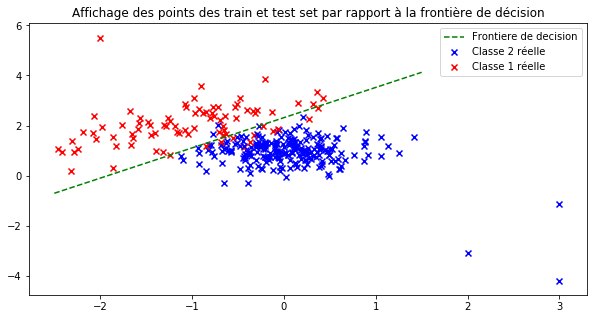

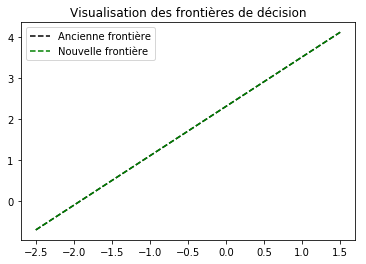

In [17]:
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
x2_perturbe = (-w_perturbe[0]-w_perturbe[1]*x1)/w_perturbe[2]
plt.figure(figsize=(10,5))
plt.plot(x1,x2_perturbe,'g--')
plt.scatter(x_test[t_test==0][:,0],x_test[t_test==0][:,1],marker='x',c='b')
plt.scatter(x_test[t_test==1][:,0],x_test[t_test==1][:,1],marker='x',c='r')
plt.scatter(X_perturbe[t_perturbe==0][:,1],X_perturbe[t_perturbe==0][:,2],marker='x',c='b')
plt.scatter(X_perturbe[t_perturbe==1][:,1],X_perturbe[t_perturbe==1][:,2],marker='x',c='r')
plt.title("Affichage des points des train et test set par rapport à la frontière de décision")
plt.legend(("Frontiere de decision","Classe 2 réelle", "Classe 1 réelle"))
plt.show()

plt.figure()
plt.plot(x1,x2,'k--')
plt.plot(x1,x2_perturbe,'g--')
plt.title("Visualisation des frontières de décision")
plt.legend(("Ancienne frontière","Nouvelle frontière"))
plt.show()

On a ajouté des points loin de la frontière de décision, 3 pour la classe 2 et 1 pour la classe 1. Le nouveau vecteur w_perturbe est proche de w. Les frontières de décision sont superposées.

On vérifie bien que cela ne déplace pas (peu) la frontière de décision (définie par la donnée de $w$). En effet avec la régression logistique, les points très éloignés ont un poids proche du poids des points qui étaient déjà les plus loins de la frontière dans X_train donné. 

Bien qu'on ait déterminé une frontière de décision linéaire, (on aurait obtenu aussi une frontière linéaire avec la régression linéaire), une simple régression linéaire nous aurait donné des résultats peu robustes car très sensibles aux exemples extrêmes, d'où l'intérêt de la régression logistique.

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [18]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


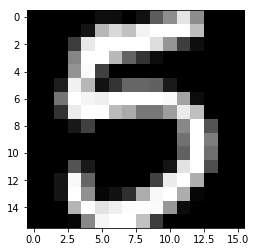

In [19]:
# Digit 5
n=42;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

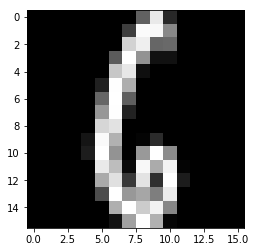

In [20]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [21]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
class_test = np.ones((875,1))
class_test[:411] = 0
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [22]:
# Exercise 2
print("Les valeurs des entrées sont comprises entre ", np.min(x_train_brut)," et ",np.max(x_train_brut))

Les valeurs des entrées sont comprises entre  -1.0  et  1.0


In [23]:
a = np.std(x_train_brut,axis=0)
list_sig = np.where(a>0.5)[0]
list_sig

array([  7,   8,   9,  10,  11,  12,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  66,  67,  68,  69,
        70,  71,  72,  73,  82,  83,  84,  85,  86,  87,  88,  89,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 244, 245, 246, 247,
       248, 249, 250, 251], dtype=int64)

On obtient la liste des indices 173 pixels significatifs

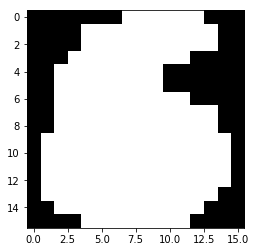

In [24]:
Isig = zeros(16*16)
Isig[list_sig]=1

Isig = np.reshape(Isig,(16,16))
plt.imshow(Isig,cmap='gray')
plt.show()

Comme on peut s'y attendre, les pixels du bord de l'image ne sont pas significatifs (en noir ci-dessus), et on peut les éliminer de notre calcul. On va donc définir x_train et x_test avec seulement les pixels significatifs :

In [25]:
x_train = np.hstack((np.ones((N_train,1)),x_train_brut[:,list_sig])) 
x_test = np.hstack((np.ones((N_test,1)),x_test_brut[:,list_sig]))
print(x_train.shape, x_test.shape)

(345, 174) (875, 174)


In [26]:
w, Niter = regression_logistique(x_train, class_train[:,0], 13)
print(w.shape, w[0])

(174,) -9.98704983993


In [27]:
y = x_test.dot(w)
y_pred = np.zeros(y.shape)
y_pred[y>0] = 1
y_pred[y<=0] = 0

erreur = sum(abs(y_pred - class_test[:,0]))/N_test
print("Erreur : ", erreur)

Erreur :  0.0788571428571


In [28]:
y_pred[20:30]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.])

Observons l'image x_test[27], qui est un 5 mais a été classée comme un 6 par notre régression logistique, et x_test[416] qui est un 6 qui a été classé comme un 5.

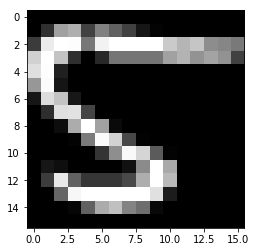

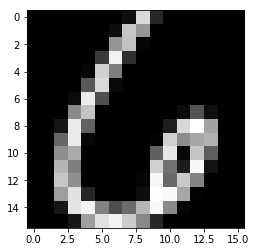

In [29]:
I1 = reshape(x_test_brut[27],(16,16))

plt.imshow(I1,cmap='gray')
plt.show()

I2 = reshape(x_test_brut[416],(16,16))

plt.figure()
plt.imshow(I2,cmap='gray')
plt.show()

On a obtenu une erreur de 7.9%

En observant les images sur lesquelles notre méthode se trompe, on voit que l'erreur peut être due à une écriture humaine plus qu'approximative, et parfois même l'oeil ne peut pas déterminer parfaitement cette classification.

On peut encore noter que le 5 et le 6 sont les deux chiffres présentant le plus de ressemblances, et on suppose que l'erreur serait plus faible pour n'importe quelle autre paire de chiffres.

On voit tout de même à travers cet exemple les limites de la régression logistique : la reconnaissance des chiffres n'est faite ici qu'à partir des pixels pris individuellement. Des techniques plus avancées de traitement d'image utilisent des combinaisons non linéaires des fonctions des entrées (frontière de décision différente d'un hyperplan), des matrices de convolution ...

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [43]:
# Include your code here
from sklearn.linear_model import LogisticRegression as LR

logistic_fit = LR(penalty='l1').fit(x_train_brut, class_train) # algorithmes d'apprentissage sur le modèle (train set)
logistic_fit.predict(x_test_brut) # on peut observer les résultats des prédictions sur le test set

#comparaison avec les classes réelles
print("Erreur : ", 1-logistic_fit.score(x_test_brut, class_test))

Erreur :  0.032


C:\Users\Lucas4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Avec scikit-learn, on obtient une erreur de 2.4% avec une régularisation de degré 2 contre 3.2% avec degré 1. Notre algorithme nous donne une erreur de 7.9% avec une régularisation de degré 1.

L'algorithme de scikit-learn offre par ailleurs la possibilité de changer d'autres paramètres. Les paramètres par défaut (que nous utilisons ici de façon implicite) aboutissent dans notre exemple à de meilleurs résultats que notre algorithme implémenté à la main. Ces paramètres par défaut sont probablement l'issue d'études et expérimentations sur différents cas d'étude.